## Another attempt to solve problem

We will consider the state 3-d vector 
$$ s_t = [p_t, x_t, t] $$
where $p_t$ is price at time t, $x_t$ stocks available to liquidate and $t$ is time.
We will consider the value function as the linear function as
$$V(s_t, \theta) = \theta_1\phi_1(p_t) + \theta_2\phi_2(x_t) + \theta_3\phi_3(t) + \theta_4 $$
Hence we need $\theta = [\theta_1,\theta_2,\theta_3,\theta_4] $ as parameters for value function.

Simlarlry we will consider the paramtric form of policy fiunction which will again depend on price, time, and avaibale stocks to sell, so similar function for the policy and vector of parameters go like $ \nu = [\nu_1,\nu_2,\nu_3,\nu_4] $

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
% %matplotlib inline

In [42]:
def getNewState(s_t, u_t):
    s_ = [0,0,0]
    if u_t < 4 or s_t[0] < 3.0:
        s_[1] = max(s_t[1]-u_t, 0) 
        s_[0] = s_t[0]
    elif u_t <= 40:
        s_[0] = s_t[0]*(1-0.0008*u_t)
        s_[1] = max(s_t[1]-u_t, 0) 
    else:
        s_[0] = s_t[0]*(1- 0.01*np.log(u_t))
        s_[1] = max(s_t[1]-u_t, 0) 
    reward = u_t*s_[0]
    #print(reward, s_[0])
    s_[0] = s_[0] + np.random.normal(0,1)
    s_[2] = s_t[2] + 1
    #print(u_t)
    return (reward, s_)

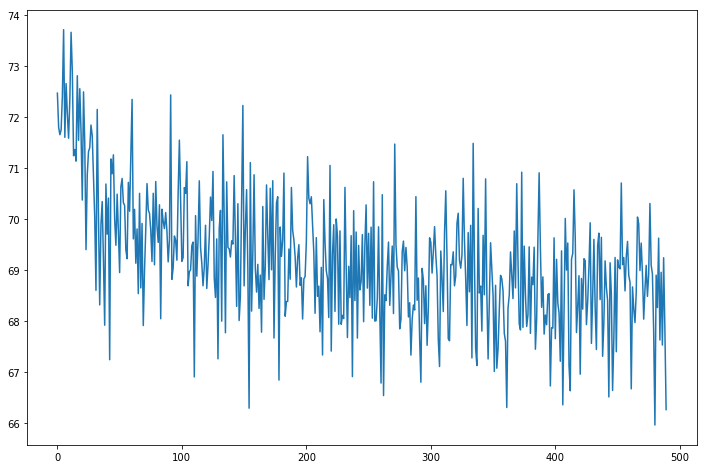

In [28]:
s_t = [71, 1000, 1]
prices = [getNewState(s_t, u_t)[1][0] for u_t in range(10, 500) ]
#print(prices)
plt.figure(figsize=(12,8))
plt.plot(prices)

In [29]:
def getAction(s_t, param):
    return (0.01*s_t[1]*s_t[0]*(1-np.exp(-np.sqrt(param/(T-np.sqrt(s_t[2]))))))/(T-np.sqrt(s_t[2]))

In [30]:
def getGradient(s_t, param):
    return (0.01*s_t[1]*s_t[0]*np.exp(-np.sqrt(param/(T-np.sqrt(s_t[2]))))/(T-np.sqrt(s_t[2])))

In [68]:
alpha_a = 0.01
alpha_c = 0.01
lammbda = 0.01

# lets initilize the parameterrs of policy as well as value function
param = np.random.random()
theta = np.random.random(3)
T = 20
for i in range(10000):
    z = [0.0,0.0,0.0] 
    # initialize the state s0
    s_t = [np.random.random()*100, int(np.random.random()*1000), 0]
    #print('u :',s_t[1])
    t = 0
    while t < T and s_t[1] > 0:
        if t == T-1:
            #u_t = s_t[1]
            delta_t = reward + s_t[0]*s_t[1] - np.dot(theta, s_t)
        else:
            u_t0 = np.random.normal(5,5)
            u_t = int(getAction(s_t, param) + u_t0)
            (reward, s) = getNewState(s_t, u_t)
            s__ = np.subtract(s , s_t)
            #s__[1] = s__[1]/1000 
            #s__[0] = s__[0]/1000
            #s__[2] = s__[2]/1000
            delta_t = reward + np.dot(theta,s__ )
            #print(delta_t, reward)
        #print(s, s_t)
        gad = getGradient(s_t, param)
        #print('gad\t', gad)
        param = param + alpha_a*delta_t*u_t0*gad
        z = [a/100 for a in s_t] + np.multiply(lammbda, z)
        #print('z\t', z)
        theta = theta + np.multiply(alpha_c*delta_t, z)      
        #print('theta\t', theta)
        s_t = s
        t = t+1
    print(param)

98.7398453231
166.276377031
156.909011891
257.134480032
259.15756714
255.117286552
264.219798298
266.2993165
253.250545858
265.399485532
576.471136763
581.419517259
582.400033603
585.065322605
565.775200089
564.46665727
563.964902385
2434.96194202
2434.95057522
2434.94888078
2434.95244821
2434.9467222
2434.94605192
2434.94604856
2434.94874968
2434.94620958
2434.93540154
2434.9382172
2434.94442077
2434.89147894
2434.68851018
2434.67609167
2434.67497741
2434.67478609
2434.66414138
2434.65886623
2434.65828808
2434.66828969
2434.65673864
2434.66326179
2434.66754333
2434.68285804
2439.57266744
2439.56243508
2439.55992744
2439.5599098
2439.53362081
2439.53204125
2439.5327972
2439.52872688
2439.33718571
2439.35693738
2439.35768161
2439.35585183
2439.37270536
2439.39247509
2439.21292433
2439.21971705
2439.2318898
2439.23247276
2439.24131226
2439.24159098
2439.24613427
2439.24647346
2439.24800983
2439.25384689
2439.26383902
2439.26320439
2439.25483395
2439.24955538
2439.24871784
2439.24705064
2

In [72]:
def actionValue():
    u = [0 for i in range(20)]
    val = [0 for i in range(20)]
    T = 20
    #for i in range(1000):
    value = 0.0
    s_t = [np.random.random()*100, int(np.random.random()*1000), 1]
    print(theta)
    t = 0
    while t < T and s_t[1] > 0:
        if t == T-1:
            #u_t = s_t[1]
            val[t] = s_t[0]*s_t[1]
            u[t] = s_t[1]
        else:
            #u_t0 = np.random.normal(5,5)
            u[t] = int(getAction(s_t, param))
            (reward, s) = getNewState(s_t, u_t)
            val[t] = np.dot(s_t, theta)
            #print(u_t, value, s_t[0])
        s_t = s
        t = t + 1
    return (val, u)

[  9.67618652  11.04516326 -10.33888882]


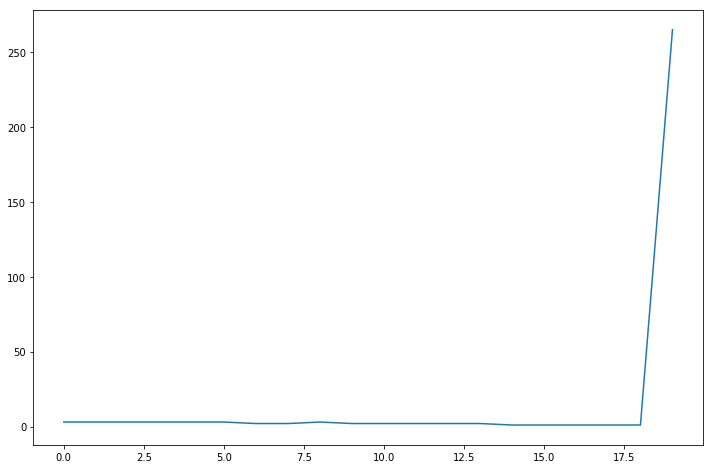

In [81]:
(val, u) = actionValue()
plt.figure(figsize=(12,8))
plt.plot(u)

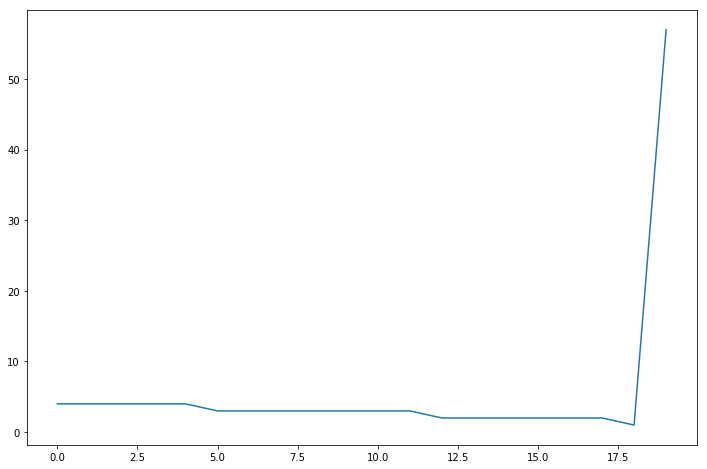

In [77]:
plt.figure(figsize=(12,8))
plt.plot(u)

Ref : Solutions to Finite Horizon Cost Problems Using Actor-Critic Reinforcement Learning Ivo Grondman et. al

http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6706755

[  9.67618652  11.04516326 -10.33888882]


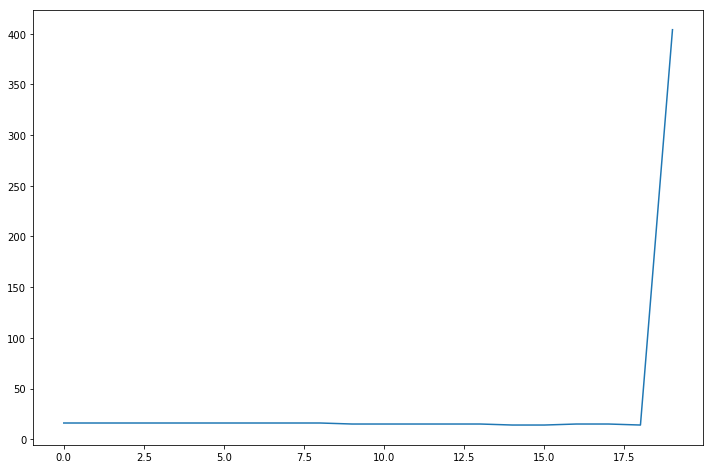

In [84]:
(val, u) = actionValue()
plt.figure(figsize=(12,8))
plt.plot(u)

In [85]:
u

[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 15,
 15,
 14,
 404]

[  9.67618652  11.04516326 -10.33888882]


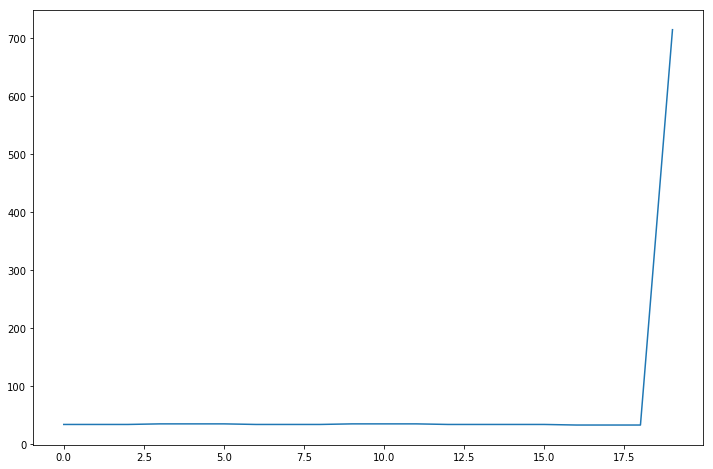

In [86]:
(val, u) = actionValue()
plt.figure(figsize=(12,8))
plt.plot(u)

In [90]:
u

[34,
 34,
 34,
 35,
 35,
 35,
 34,
 34,
 34,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 714]